In [1]:
!nvidia-smi

Wed Feb 21 18:35:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# New Section

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_Learning/DATA/Churn_Modelling.csv")
data1.shape

(10000, 14)

In [4]:
data1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data2=data1.iloc[:,3:]

In [6]:
data2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
x=data2.drop(["Exited"], axis=1)
y=data2["Exited"]

In [8]:
x=pd.get_dummies(x,drop_first=True)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
x.shape

(10000, 11)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train.shape


(8000, 11)

In [14]:
import tensorflow as tf
import keras

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [83]:
# Building an Artificial Neural Network

model=Sequential()

In [84]:
# input layer
model.add(Dense(units=11,kernel_initializer="he_uniform",input_dim=11))

In [85]:
# First hidden layer
model.add(Dense(units=8,kernel_initializer="he_uniform", activation="relu"))

In [86]:
# Second hidden layer
model.add(Dense(units=6,kernel_initializer="glorot_uniform", activation="sigmoid"))

In [87]:
#Output Layer
model.add(Dense(units=1,activation="sigmoid"))

In [90]:
#compile the layers of the model
model.compile(optimizer="Adam",loss="binary_crossentropy", metrics="accuracy")

In [91]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 11)                132       
                                                                 
 dense_38 (Dense)            (None, 8)                 96        
                                                                 
 dense_39 (Dense)            (None, 6)                 54        
                                                                 
 dense_40 (Dense)            (None, 1)                 7         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
modelF=model.fit(x_train,y_train,validation_split=0.3,batch_size=32,epochs=100)

Epoch 1/100
175/175 [==============================] - 2s 5ms/step - loss: 0.5133 - accuracy: 0.7970 - val_loss: 0.4873 - val_accuracy: 0.7887
Epoch 2/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4649 - accuracy: 0.7970 - val_loss: 0.4655 - val_accuracy: 0.7887
Epoch 3/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4450 - accuracy: 0.7970 - val_loss: 0.4510 - val_accuracy: 0.7887
Epoch 4/100
175/175 [==============================] - 1s 5ms/step - loss: 0.4306 - accuracy: 0.7970 - val_loss: 0.4403 - val_accuracy: 0.7887
Epoch 5/100
175/175 [==============================] - 1s 6ms/step - loss: 0.4189 - accuracy: 0.7982 - val_loss: 0.4307 - val_accuracy: 0.7996
Epoch 6/100
175/175 [==============================] - 1s 5ms/step - loss: 0.4079 - accuracy: 0.8089 - val_loss: 0.4209 - val_accuracy: 0.8067
Epoch 7/100
175/175 [==============================] - 1s 6ms/step - loss: 0.3978 - accuracy: 0.8170 - val_loss: 0.4126 - val_accuracy: 0.8104

In [95]:
modelF.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

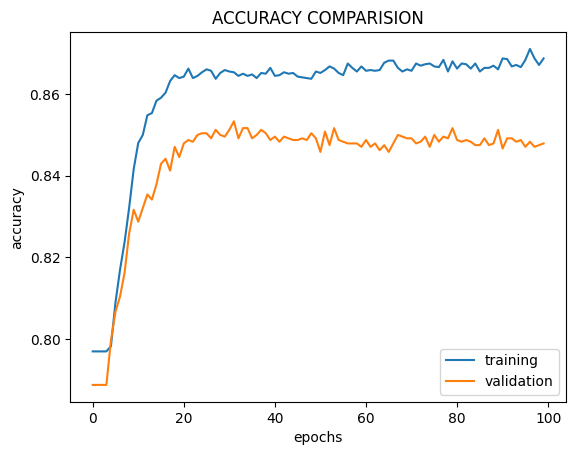

In [97]:
plt.plot(modelF.history['accuracy'])
plt.plot(modelF.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc=4)
plt.title('ACCURACY COMPARISION')
plt.show()

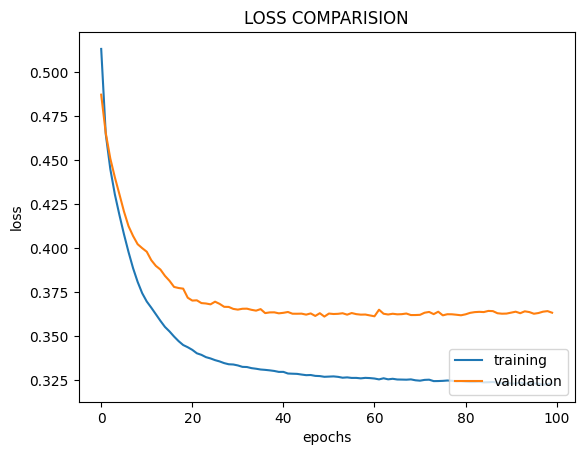

In [98]:
plt.plot(modelF.history['loss'])
plt.plot(modelF.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc=4)
plt.title('LOSS COMPARISION')
plt.show()